In [197]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

In [198]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [199]:
athletes_csv = '/content/drive/MyDrive/Netology_homeworks/06Machine_Learning/04.Regularization_sensitivity_PPV_accuracy/athletes.csv'

In [200]:
athletes_data = pd.read_csv(athletes_csv, index_col='id')

1. Преобразуйте данные:
a. проверьте наличие пропущенных значений. Преобразуйте/удалите пропуски по необходимости;
b. закодируйте категориальные переменные числовыми значениями по необходимости.

In [201]:
athletes_data.dropna(inplace=True)

In [202]:
# Вначале, не взглянув на файл athletes_classifier (пример учителя), я решил, что нужно предсказать получение определенной медали в зависимости от исходных параметров атлетов.
# В образце (athletes_classifier) зависимой переменной является пол спортсмена. Но идея предсказания того, какую медаль получит спортсмен, мне понравилась, и я ее оставил.
# Для этого надо было перевести данные по медалям в бинарный тип, и следующие несколько шагов я предпринял для этого: 1) бинарные данные - получил ли спортсмен золотую медаль или нет.
# Для этого сделал функцию gld_slvr_bronze и ввёл дополнительный столбец, после чего удалил столбцы gold, silver, bronze. 2) применил метод get_dummies к столбцам пол, национальность, вид спорта.
# 3) перевел столбец medal в числовые значения. 4) убрал из исследуемых данных фамилии и даты рождения

def gld_slvr_bronze(dt):
  medal = ''
  if(dt['gold'] == 1):
    medal = 'gold'
  else:
    medal = 'none'

  return medal

In [203]:
athletes_data['medal'] = athletes_data.apply(gld_slvr_bronze, axis=1)

In [204]:
athletes_data = pd.get_dummies(athletes_data, columns=['sex', 'nationality', 'sport'])

In [205]:
athletes_data = athletes_data.drop(['gold', 'silver', 'bronze'], axis=1)

In [206]:
athletes_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10858 entries, 736041664 to 711404576
Columns: 234 entries, name to sport_wrestling
dtypes: float64(2), object(3), uint8(229)
memory usage: 2.9+ MB


In [207]:
athletes_data.head()

,name,dob,height,weight,medal,sex_female,sex_male,nationality_AFG,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,nationality_ARG,nationality_ARM,nationality_ARU,nationality_ASA,nationality_AUS,nationality_AUT,nationality_AZE,nationality_BAH,nationality_BAN,nationality_BAR,nationality_BDI,nationality_BEL,nationality_BEN,nationality_BER,nationality_BHU,nationality_BIH,nationality_BIZ,nationality_BLR,nationality_BOL,nationality_BOT,nationality_BRA,nationality_BRN,nationality_BRU,nationality_BUL,nationality_BUR,nationality_CAF,nationality_CAM,nationality_CAN,nationality_CAY,nationality_CGO,nationality_CHA,nationality_CHI,nationality_CHN,nationality_CIV,nationality_CMR,nationality_COD,nationality_COK,nationality_COL,nationality_COM,nationality_CPV,nationality_CRC,nationality_CRO,nationality_CUB,nationality_CYP,nationality_CZE,nationality_DEN,nationality_DJI,nationality_DMA,nationality_DOM,nationality_ECU,nationality_EGY,nationality_ERI,nationality_ESA,nationality_ESP,nationality_EST,nationality_ETH,nationality_FIJ,nationality_FIN,nationality_FRA,nationality_FSM,nationality_GAB,nationality_GBR,nationality_GBS,nationality_GEO,nationality_GEQ,nationality_GER,nationality_GHA,nationality_GRE,nationality_GRN,nationality_GUA,nationality_GUI,nationality_GUM,nationality_GUY,nationality_HAI,nationality_HKG,nationality_HON,nationality_HUN,nationality_INA,nationality_IND,nationality_IOA,nationality_IRI,nationality_IRL,nationality_IRQ,nationality_ISL,nationality_ISR,nationality_ISV,nationality_ITA,nationality_IVB,nationality_JAM,nationality_JOR,nationality_JPN,nationality_KAZ,nationality_KEN,nationality_KGZ,nationality_KIR,nationality_KOR,nationality_KOS,nationality_KSA,nationality_LAO,nationality_LAT,nationality_LBA,nationality_LCA,nationality_LES,nationality_LIB,nationality_LIE,nationality_LTU,nationality_LUX,nationality_MAD,nationality_MAR,nationality_MAS,nationality_MAW,nationality_MDA,nationality_MEX,nationality_MGL,nationality_MHL,nationality_MKD,nationality_MLI,nationality_MLT,nationality_MNE,nationality_MON,nationality_MOZ,nationality_MRI,nationality_MTN,nationality_MYA,nationality_NAM,nationality_NCA,nationality_NED,nationality_NEP,nationality_NGR,nationality_NIG,nationality_NOR,nationality_NRU,nationality_NZL,nationality_OMA,nationality_PAK,nationality_PAN,nationality_PAR,nationality_PER,nationality_PHI,nationality_PLE,nationality_PLW,nationality_PNG,nationality_POL,nationality_POR,nationality_PRK,nationality_PUR,nationality_QAT,nationality_ROT,nationality_ROU,nationality_RSA,nationality_RUS,nationality_RWA,nationality_SAM,nationality_SEN,nationality_SEY,nationality_SIN,nationality_SKN,nationality_SLO,nationality_SMR,nationality_SOL,nationality_SRB,nationality_SRI,nationality_SSD,nationality_STP,nationality_SUD,nationality_SUI,nationality_SUR,nationality_SVK,nationality_SWE,nationality_SWZ,nationality_SYR,nationality_TAN,nationality_TGA,nationality_THA,nationality_TJK,nationality_TKM,nationality_TOG,nationality_TPE,nationality_TTO,nationality_TUN,nationality_TUR,nationality_TUV,nationality_UAE,nationality_UKR,nationality_URU,nationality_USA,nationality_UZB,nationality_VAN,nationality_VEN,nationality_VIE,nationality_VIN,nationality_YEM,nationality_ZAM,nationality_ZIM,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,sport_fencing,sport_football,sport_golf,sport_gymnastics,sport_handball,sport_hockey,sport_judo,sport_modern pentathlon,sport_rowing,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
736041664,A Jesus Garcia,10/17/69,1.72,64.0,none,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

2. Разделите выборку на обучающее (80% данных) и тестовое (20% данных) подмножества.

In [209]:
le = LabelEncoder()

In [210]:
le.fit(athletes_data['medal'])

LabelEncoder()

In [211]:
y = pd.Series(data=le.transform(athletes_data['medal']))

In [212]:
X = athletes_data.drop(['name', 'dob', 'medal'], axis=1)

In [213]:
X.head()

,height,weight,sex_female,sex_male,nationality_AFG,nationality_ALB,nationality_ALG,nationality_AND,nationality_ANG,nationality_ANT,nationality_ARG,nationality_ARM,nationality_ARU,nationality_ASA,nationality_AUS,nationality_AUT,nationality_AZE,nationality_BAH,nationality_BAN,nationality_BAR,nationality_BDI,nationality_BEL,nationality_BEN,nationality_BER,nationality_BHU,nationality_BIH,nationality_BIZ,nationality_BLR,nationality_BOL,nationality_BOT,nationality_BRA,nationality_BRN,nationality_BRU,nationality_BUL,nationality_BUR,nationality_CAF,nationality_CAM,nationality_CAN,nationality_CAY,nationality_CGO,nationality_CHA,nationality_CHI,nationality_CHN,nationality_CIV,nationality_CMR,nationality_COD,nationality_COK,nationality_COL,nationality_COM,nationality_CPV,nationality_CRC,nationality_CRO,nationality_CUB,nationality_CYP,nationality_CZE,nationality_DEN,nationality_DJI,nationality_DMA,nationality_DOM,nationality_ECU,nationality_EGY,nationality_ERI,nationality_ESA,nationality_ESP,nationality_EST,nationality_ETH,nationality_FIJ,nationality_FIN,nationality_FRA,nationality_FSM,nationality_GAB,nationality_GBR,nationality_GBS,nationality_GEO,nationality_GEQ,nationality_GER,nationality_GHA,nationality_GRE,nationality_GRN,nationality_GUA,nationality_GUI,nationality_GUM,nationality_GUY,nationality_HAI,nationality_HKG,nationality_HON,nationality_HUN,nationality_INA,nationality_IND,nationality_IOA,nationality_IRI,nationality_IRL,nationality_IRQ,nationality_ISL,nationality_ISR,nationality_ISV,nationality_ITA,nationality_IVB,nationality_JAM,nationality_JOR,nationality_JPN,nationality_KAZ,nationality_KEN,nationality_KGZ,nationality_KIR,nationality_KOR,nationality_KOS,nationality_KSA,nationality_LAO,nationality_LAT,nationality_LBA,nationality_LCA,nationality_LES,nationality_LIB,nationality_LIE,nationality_LTU,nationality_LUX,nationality_MAD,nationality_MAR,nationality_MAS,nationality_MAW,nationality_MDA,nationality_MEX,nationality_MGL,nationality_MHL,nationality_MKD,nationality_MLI,nationality_MLT,nationality_MNE,nationality_MON,nationality_MOZ,nationality_MRI,nationality_MTN,nationality_MYA,nationality_NAM,nationality_NCA,nationality_NED,nationality_NEP,nationality_NGR,nationality_NIG,nationality_NOR,nationality_NRU,nationality_NZL,nationality_OMA,nationality_PAK,nationality_PAN,nationality_PAR,nationality_PER,nationality_PHI,nationality_PLE,nationality_PLW,nationality_PNG,nationality_POL,nationality_POR,nationality_PRK,nationality_PUR,nationality_QAT,nationality_ROT,nationality_ROU,nationality_RSA,nationality_RUS,nationality_RWA,nationality_SAM,nationality_SEN,nationality_SEY,nationality_SIN,nationality_SKN,nationality_SLO,nationality_SMR,nationality_SOL,nationality_SRB,nationality_SRI,nationality_SSD,nationality_STP,nationality_SUD,nationality_SUI,nationality_SUR,nationality_SVK,nationality_SWE,nationality_SWZ,nationality_SYR,nationality_TAN,nationality_TGA,nationality_THA,nationality_TJK,nationality_TKM,nationality_TOG,nationality_TPE,nationality_TTO,nationality_TUN,nationality_TUR,nationality_TUV,nationality_UAE,nationality_UKR,nationality_URU,nationality_USA,nationality_UZB,nationality_VAN,nationality_VEN,nationality_VIE,nationality_VIN,nationality_YEM,nationality_ZAM,nationality_ZIM,sport_aquatics,sport_archery,sport_athletics,sport_badminton,sport_basketball,sport_canoe,sport_cycling,sport_equestrian,sport_fencing,sport_football,sport_golf,sport_gymnastics,sport_handball,sport_hockey,sport_judo,sport_modern pentathlon,sport_rowing,sport_rugby sevens,sport_sailing,sport_shooting,sport_table tennis,sport_taekwondo,sport_tennis,sport_triathlon,sport_volleyball,sport_weightlifting,sport_wrestling
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
736041664,1.72,64.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Постройте ROC-кривую с помощью функции sklearn.metrics. roc_curve.
Вычислите значение ROC-AUC метрики с помощью функции sklearn.metrics.roc_auc_score.



In [215]:
model = LogisticRegression(max_iter = 10000)

In [216]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [217]:
predictions = model.predict_proba(X_test)

In [218]:
model.score(X_train, y_train)

0.947041215749482

In [219]:
model.score(X_test, y_test)

0.9507366482504604

In [220]:
fpr, tpr, thres = roc_curve(y_test, predictions[:, 1])

In [221]:
x_line = [0, 1]
y_line = x_line

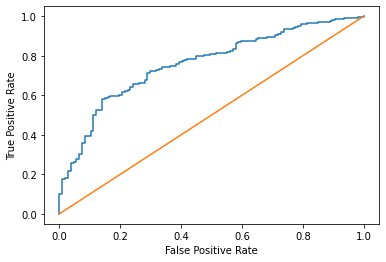

In [233]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(x_line, y_line)

In [223]:
roc_auc_score(y_test, predictions[:, 1])

0.7595166436604738

Реализуйте подсчет метрик TPR, FPR «вручную», без использования готовых функций из библиотеки sklearn.

In [224]:
tpr_calculated = []
fpr_calculated = []

for thresh in np.arange(0, 1, 0.005):
  tp = 0 # True positive
  fp = 0 # False positive
  fn = 0 # False negative
  tn = 0 # True negative

  for predicted_prob, actual in zip( predictions[:, 1], y_test ):    
    if predicted_prob >= thresh:
        predicted = 1
    else:
        predicted = 0

    if predicted == 1:
        if actual == 1:
            tp += 1
        else:
            fp += 1

    else:
        if actual == 1:
            fn += 1
        else:
            tn += 1
  tpr_calculated.append(tp/(tp+fn))
  fpr_calculated.append(fp/(fp+tn))

Text(0, 0.5, 'True Positive Rate')

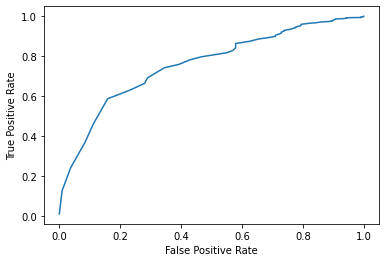

In [234]:
plt.plot(fpr_calculated, tpr_calculated)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [226]:
predict_accuracy = (tp + tn) / (tp + fp + fn + tn)

In [227]:
predict_accuracy

0.06123388581952118

In [228]:
predict_precision = tp / (tp + fp)

In [229]:
predict_precision

1.0

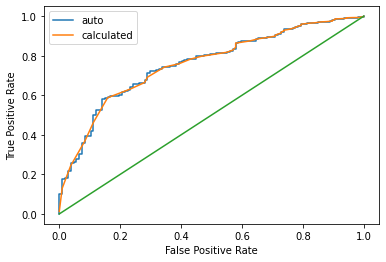

In [235]:
plt.plot(fpr, tpr, label='auto')
plt.plot(fpr_calculated, tpr_calculated, label='calculated')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(x_line, y_line)
plt.legend()
plt.show()

In [231]:
pr, re, thresh = precision_recall_curve( y_test, predictions[:, 1] )

Text(0, 0.5, 'Recall')

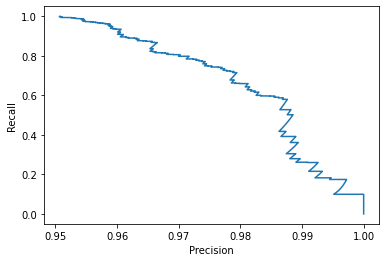

In [236]:
plt.plot(pr, re)
plt.xlabel('Precision')
plt.ylabel('Recall')

Выводы: 

1. Чем больше площадь (area under curve, AUC) под кривой ROC, тем более качественно модель классифицирует объекты. Кривая precision-recall отображает компромисс между данными параметрами в зависимости от выбранного порогового значения.

2. ROC кривая всегда проходит выше диагонали [0,0], [1,1], иначе модель будет бесполезной